In [11]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *
import      configparser
inputs = configparser.ConfigParser()

#path dove stanno i dati del fit
spectra_path =   '../BRILLOUIN/TDP43/ARS_13_02/'
spectra_filename    =   'ARS_13_02'
analysis_dir     =   'analysis_nodelta_lm'
now_path         =   spectra_path+analysis_dir+'/'
with open(now_path+'config.ini', 'r') as f:
    inputs.read_file(f)
### recupero info su dimensionalità
n_rows    =     inputs.getint('I/O', 'n_rows')
n_cols    =     inputs.getint('I/O', 'n_cols')
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 89x85, per un totale di 7565 spettri


In [12]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

x = np.load(now_path+'x.npy', allow_pickle = True)
y = np.load(now_path+'y.npy', allow_pickle = True)

count = 0
for ii in range(n_rows):
    for jj in range (n_cols):
        matrix[ii][jj].Recover_VIPA(x_VIPA, y_VIPA)
        matrix[ii][jj].Recover_Spectrum(x[count],y[count])    
        count+=1
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)
        
if count != (n_rows*n_cols): raise ValueError('Incompatibile')
print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [13]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni parametri fit ({})".format(len(boni), len(lines)))
if (len(boni) != len(costi)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni costo fit ({})".format(len(boni), len(costi)))
if (len(boni) != len(y_fits)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e y fit ({})".format(len(boni), len(y_fits)))


for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')




Ok ho recuperato le informazioni del Fit Markoviano


Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


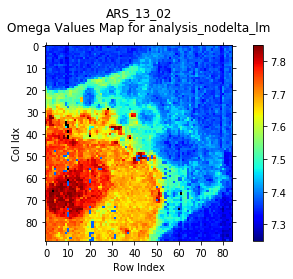

Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


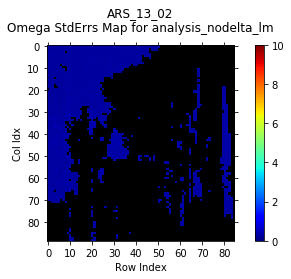

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


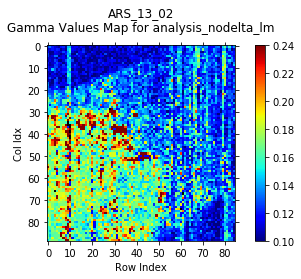

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


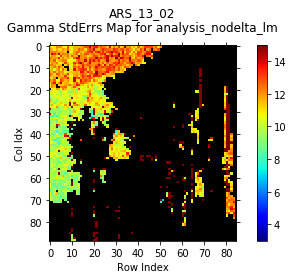

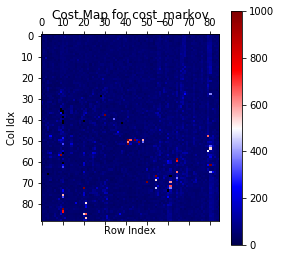

In [14]:
#MAPPE
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.85, analysis_dir, spectra_filename, fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, analysis_dir, spectra_filename ,fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.24,analysis_dir, spectra_filename ,fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 3, 15, analysis_dir, spectra_filename, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

In [ ]:
#HISTOGRAMs - MARKOV
markov_Omegas = np.array([matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
markov_Gammas =  np.array([matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])


plt.figure()
plt.title('{}\nOmega distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Omegas), np.std(markov_Omegas)))
plt.savefig(now_path+'Omega_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('{}\nGamma distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Gammas), np.std(markov_Gammas)))
plt.savefig(now_path+'Gamma_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [65]:
#Parametri di Interesse per analisi
markov_too_bad = ()
markov_too_good  = ()
markov_omega_too_high =  ()
markov_gamma_too_bad = ()

markov_omega_max = np.mean(markov_Omegas)+3*np.std(markov_Omegas)
markov_gamma_max = np.mean(markov_Gammas)+3*np.std(markov_Gammas)
cost_max = 1000
cost_min = 50


markov_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'markov')
markov_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'markov')
markov_omega_too_high = Whose_Param_Too_High('Omega', markov_omega_max, 'markov', matrix, boni)
markov_gamma_too_high = Whose_Param_Too_High('Gamma', markov_gamma_max, 'markov', matrix, boni)


#aggiunte 
markov_too_offset = ()
percentage_gamma = 15
max_offset = 30
markov_almost_height = ()

for (ii,jj) in boni:
    if matrix[ii][jj].Markov_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Markov_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        markov_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Markov_Fit_Params['offset'].values[0] > max_offset:
        markov_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        markov_almost_height += ((ii,jj),)


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(markov_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(markov_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(markov_omega_too_high), markov_omega_max))
print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(markov_gamma_too_high), markov_gamma_max))

print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(markov_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(markov_too_offset), max_offset))





I found 51 bad elements out of 7550

I found 2326 good elements out of 7550





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/ARS_13_02/analysis_delta_lm/ :

51 elementi con chi quadro > 1000 
2326 elementi con chi quadro < 50 

2 elementi con Omega > Omega max 7.99
15 elementi con Gamma > Gamma max 0.31

1884 elementi con Gamma con errore percentuale > 15 

2042 elementi con offset > 30 



(0, 0)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014327  7.352865  0.109799       -0.062822     0.024737   
StdErrs   0.037095  0.022252  0.013402        0.015080     0.017203   
Initials  0.010000  7.661468  0.100000        0.000000     0.100000   

          delta_amplitude             A          mu       sigma     shift  \
Values           0.010305  4.591798e+05    7.281757   27.668869  0.022426   
StdErrs          0.006008  6.268120e+14  179.072939  328.922012  0.019807   
Initials         1.000000  4.546282e+03   11.962272   16.790802  0.000000   

            offset  
Values    7.334511  
StdErrs   1.702030  
Initials  0.000000  


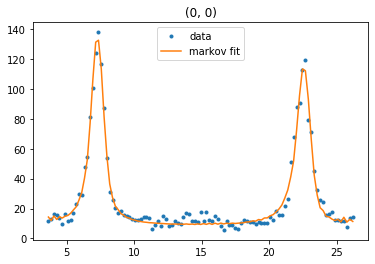

(0, 1)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013601  7.355861  0.106380       -0.056326     0.001690   
StdErrs   0.030762  0.023175  0.012922        0.002597     0.003721   
Initials  0.014327  7.352865  0.109799       -0.062822     0.024737   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.001126  4.591798e+05  12.781138  -30.681862  0.114709   
StdErrs          0.001794  8.586295e+14  49.238744  391.354619  0.021140   
Initials         0.010305  4.591798e+05   7.281757   27.668869  0.022426   

            offset  
Values    4.651953  
StdErrs   1.408454  
Initials  7.334511  


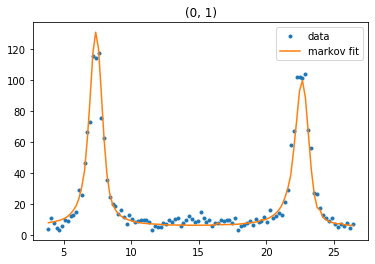

(0, 2)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013736  7.392716  0.104161       -0.055849    -0.000147   
StdErrs   0.034642  0.023362  0.013380        0.000381     0.013407   
Initials  0.013601  7.355861  0.106380       -0.056326     0.001690   

          delta_amplitude             A          mu       sigma     shift  \
Values          -0.002454  4.591798e+05   -0.673781  -35.297284  0.122593   
StdErrs          0.204334  1.111866e+15  577.523216  662.777709  0.020398   
Initials         0.001126  4.591798e+05   12.781138  -30.681862  0.114709   

            offset  
Values    4.705029  
StdErrs   1.615888  
Initials  4.651953  


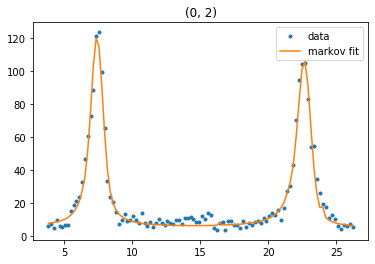

(0, 3)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014622  7.331227  0.128923       -0.057144    -0.000376   
StdErrs   0.033426  0.021525  0.014663        0.000526     0.000847   
Initials  0.013736  7.392716  0.104161       -0.055849    -0.000147   

          delta_amplitude             A          mu       sigma     shift  \
Values          -0.001659  4.591798e+05   -1.388454  -34.692510  0.133172   
StdErrs          0.001814  7.906402e+14  532.613112  574.388576  0.022798   
Initials        -0.002454  4.591798e+05   -0.673781  -35.297284  0.122593   

            offset  
Values    7.169164  
StdErrs   1.506461  
Initials  4.705029  


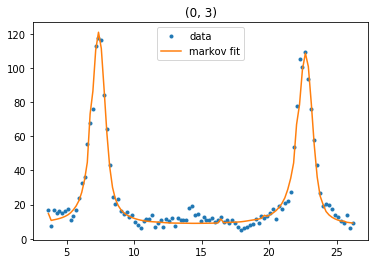

(0, 4)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014622  7.331227  0.128923       -0.057144    -0.000376   
StdErrs   0.033681  0.021582  0.014719        0.000533     0.000870   
Initials  0.014622  7.331227  0.128923       -0.057144    -0.000376   

          delta_amplitude             A          mu       sigma     shift  \
Values          -0.001659  4.591798e+05   -1.388454  -34.692510  0.133172   
StdErrs          0.001806  8.158483e+14  536.670867  578.884185  0.022837   
Initials        -0.001659  4.591798e+05   -1.388454  -34.692510  0.133172   

            offset  
Values    7.169164  
StdErrs   1.503141  
Initials  7.169164  


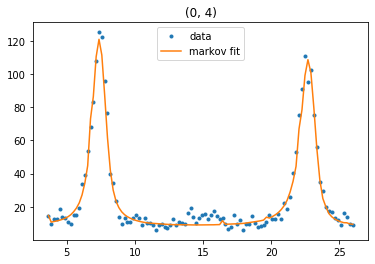

(0, 5)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014146  7.353498  0.109724       -0.100012    -0.020864   
StdErrs   0.034995  0.021836  0.013043        0.012217     0.014174   
Initials  0.014622  7.331227  0.128923       -0.057144    -0.000376   

          delta_amplitude             A          mu       sigma     shift  \
Values           0.008156  4.591798e+05    1.667310  -29.564188  0.117880   
StdErrs          0.004946  1.060010e+15  338.549806  383.712735  0.021598   
Initials        -0.001659  4.591798e+05   -1.388454  -34.692510  0.133172   

            offset  
Values    5.718438  
StdErrs   1.618349  
Initials  7.169164  


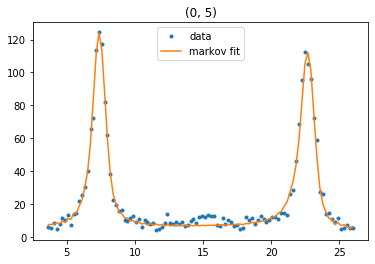

(0, 6)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014914  7.340686  0.132048       -0.082587    -0.062144   
StdErrs   0.033351  0.021144  0.014324        0.197283     0.173438   
Initials  0.014146  7.353498  0.109724       -0.100012    -0.020864   

          delta_amplitude             A          mu       sigma     shift  \
Values           0.004497  4.591798e+05   -1.327613  -37.832727  0.118703   
StdErrs          0.006558  7.231121e+14  616.436938  727.522012  0.022554   
Initials         0.008156  4.591798e+05    1.667310  -29.564188  0.117880   

            offset  
Values    4.989729  
StdErrs   1.336849  
Initials  5.718438  


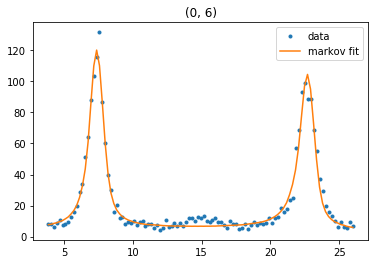

(0, 7)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014219  7.356804  0.104338        1.795999    -1.088385   
StdErrs   0.048284  0.024352  0.013220        3.190550     9.916069   
Initials  0.014914  7.340686  0.132048       -0.082587    -0.062144   

          delta_amplitude             A          mu       sigma     shift  \
Values           0.001533  4.591798e+05    3.072960  -27.653304  0.272314   
StdErrs          0.009252  9.263809e+14  359.122058  431.800213  0.019762   
Initials         0.004497  4.591798e+05   -1.327613  -37.832727  0.118703   

            offset  
Values    6.107614  
StdErrs   2.613046  
Initials  4.989729  


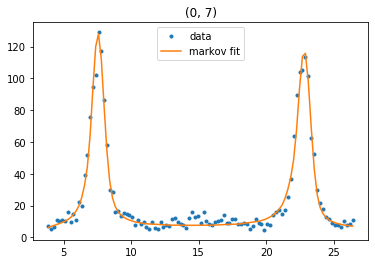

(0, 8)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.014437  7.335295  0.137447       -2.927241   -12.077779   
StdErrs   0.018837  0.020287  0.019156        8.177374    11.701962   
Initials  0.014219  7.356804  0.104338        1.795999    -1.088385   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.027529  4.591798e+05   7.692873  -23.723224  0.260289   
StdErrs          0.037371  5.645965e+14  62.927375  108.219485  0.020304   
Initials         0.001533  4.591798e+05   3.072960  -27.653304  0.272314   

             offset  
Values    24.510830  
StdErrs   14.389500  
Initials   6.107614  


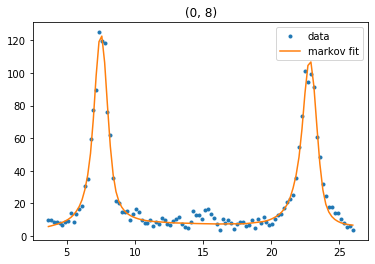

(0, 9)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.011392  7.374743  0.120046       -7.554412   -10.790734   
StdErrs   0.015423  0.023609  0.020010        6.092667     9.801199   
Initials  0.014437  7.335295  0.137447       -2.927241   -12.077779   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.019476  4.591798e+05  10.625046 -15.599019 -0.016286   
StdErrs          0.076046  7.408994e+14  17.181004  31.514429  0.021090   
Initials         0.027529  4.591798e+05   7.692873 -23.723224  0.260289   

             offset  
Values    32.493796  
StdErrs   36.388239  
Initials  24.510830  


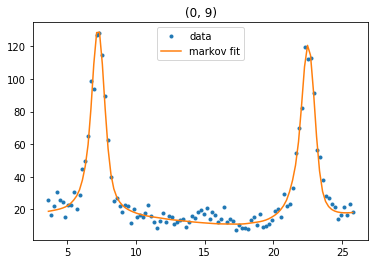

In [68]:
Plot_Elements_Spectrum(matrix, boni[:10], fit = 'markov')

In [70]:
for ii,jj in boni[:5]:
    print(matrix[ii][jj].Markov_Fit_Params.values[0])

[ 1.43270164e-02  7.35286534e+00  1.09799011e-01 -6.28222569e-02
  2.47365037e-02  1.03051972e-02  4.59179832e+05  7.28175703e+00
  2.76688687e+01  2.24256621e-02  7.33451079e+00]
[ 1.36012230e-02  7.35586056e+00  1.06380424e-01 -5.63260070e-02
  1.68985171e-03  1.12649379e-03  4.59179832e+05  1.27811380e+01
 -3.06818622e+01  1.14709295e-01  4.65195315e+00]
[ 1.37363086e-02  7.39271585e+00  1.04161390e-01 -5.58489416e-02
 -1.47288188e-04 -2.45383266e-03  4.59179832e+05 -6.73781493e-01
 -3.52972836e+01  1.22593126e-01  4.70502874e+00]
[ 1.46224667e-02  7.33122699e+00  1.28922583e-01 -5.71440933e-02
 -3.75926391e-04 -1.65882299e-03  4.59179832e+05 -1.38845442e+00
 -3.46925105e+01  1.33172396e-01  7.16916447e+00]
[ 1.46224667e-02  7.33122699e+00  1.28922583e-01 -5.71440933e-02
 -3.75926391e-04 -1.65882299e-03  4.59179832e+05 -1.38845442e+00
 -3.46925105e+01  1.33172396e-01  7.16916447e+00]


In [15]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


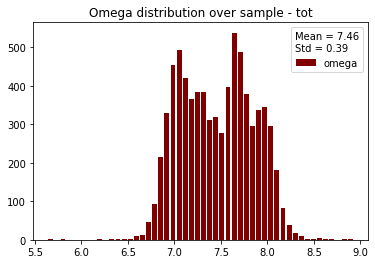

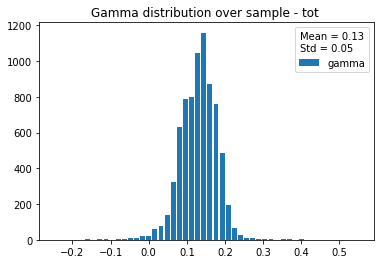

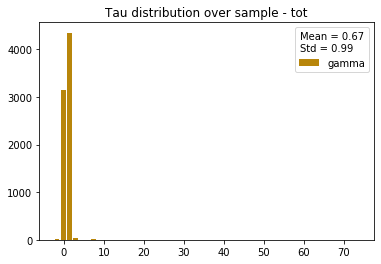

In [16]:
#HISTOGRAMs
tot_Omegas = np.array([matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
tot_Gammas =  np.array([matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])
taus       = np.array([matrix[ii][jj].Tot_Fit_Params['tau'].values[0] for (ii,jj) in boni])

plt.figure()
plt.title('Omega distribution over sample - tot')
_ = plt.hist(tot_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Omegas), np.std(tot_Omegas)))
plt.savefig(now_path+'Omega_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Gamma distribution over sample - tot ')
_ = plt.hist(tot_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Gammas), np.std(tot_Gammas)))
plt.savefig(now_path+'Gamma_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Tau distribution over sample - tot')
_ = plt.hist(taus, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8, color = 'darkgoldenrod')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(taus), np.std(taus)))
plt.savefig(now_path+'tau_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [21]:
#Parametri di Interesse per analisi
tot_too_bad = ()
tot_too_good  = ()
tot_omega_too_high =  ()
tot_gamma_too_bad = ()
tau_not_bad = []

tot_omega_max = np.mean(tot_Omegas)+3*np.std(tot_Omegas)
tot_omega_min = np.mean(tot_Omegas)-3*np.std(tot_Omegas)

tot_gamma_max = np.mean(tot_Gammas)+5*np.std(tot_Gammas)
cost_max = 1000
cost_min = 50


tot_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'tot')
tot_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'tot')
tot_omega_too_high = Whose_Param_Too_High('Omega', tot_omega_max, 'tot', matrix, boni)
tot_gamma_too_high = Whose_Param_Too_High('Gamma', tot_gamma_max, 'tot', matrix, boni)
tot_omega_too_low =  Whose_Param_Too_Low('Omega', tot_omega_min,'tot', matrix, boni)

#aggiunte 
omega_different_from_mark = []
gamma_different_from_mark = []

percentage_diff = 0.8
tot_too_offset = ()
percentage_gamma = 100
max_offset = 30
almost_height = ()

for (ii,jj) in boni:
    
    perc_omega = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100
    perc_gamma = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100

    if (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] > matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] < matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] - perc_gamma):
        omega_different_from_mark.append((ii,jj))
    if (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] > matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] < matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] - perc_omega):
        gamma_different_from_mark.append((ii,jj))
    if matrix[ii][jj].Tot_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Tot_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        tot_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['offset'].values[0] > max_offset:
        tot_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        tot_almost_height += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['tau']['StdErrs'] < matrix[ii][jj].Tot_Fit_Params['tau']['Values']:
        tau_not_bad.append((ii,jj))


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(tot_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(tot_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(tot_omega_too_high), tot_omega_max))
print('{} elementi con Omega < Omega min {:3.2f}'.format(len(tot_omega_too_low), tot_omega_min))

print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(tot_gamma_too_high), tot_gamma_max))


print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(tot_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(tot_too_offset), max_offset))

print('{} elementi il cui fit tot di Omega è diverso del {} percento da markoviano'.format(len(omega_different_from_mark), percentage_diff))
print('{} elementi il cui fit tot di Gamma è diverso del {} percento da markoviano'.format(len(gamma_different_from_mark), percentage_diff))
print('{} elementi il cui fit di tau non è cosi male..'.format(len(tau_not_bad)), tau_not_bad)


I found 0 bad elements out of 7550

I found 3555 good elements out of 7550





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/ARS_13_02/analysis_nodelta_lm/ :

0 elementi con chi quadro > 1000 
3555 elementi con chi quadro < 50 

8 elementi con Omega > Omega max 8.62
4 elementi con Omega < Omega min 6.29
7 elementi con Gamma > Gamma max 0.37

2227 elementi con Gamma con errore percentuale > 100 

2 elementi con offset > 30 

7317 elementi il cui fit tot di Omega è diverso del 0.8 percento da markoviano
1599 elementi il cui fit tot di Gamma è diverso del 0.8 percento da markoviano
1 elementi il cui fit di tau non è cosi male.. [(80, 16)]


In [74]:
Plot_Elements_Spectrum(matrix, tau_not_bad[:10], fit = 'tot')

Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


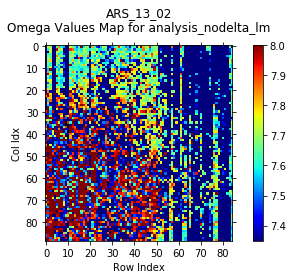

Completata Parameter_Map per Omega
Ho trovato 15 elementi saturati


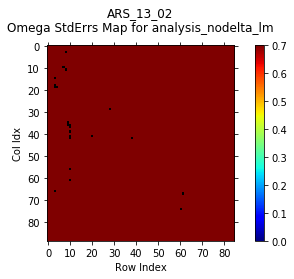

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


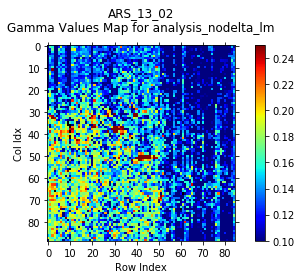

Completata Parameter_Map per Gamma
Ho trovato 15 elementi saturati


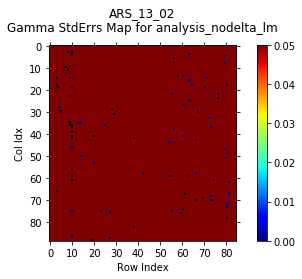

Completata Parameter_Map per tau
Ho trovato 15 elementi saturati


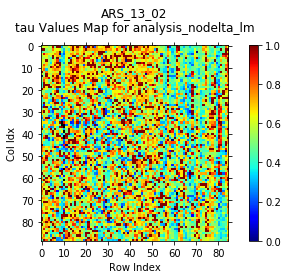

Completata Parameter_Map per tau
Ho trovato 15 elementi saturati


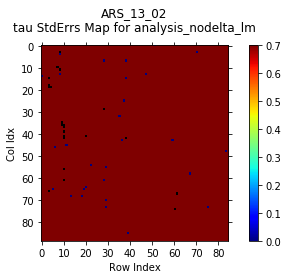

In [17]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.35, 8., analysis_dir, spectra_filename,fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,0.7,analysis_dir, spectra_filename, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.25, analysis_dir, spectra_filename,fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0,0.05,analysis_dir, spectra_filename, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0,0.7,analysis_dir, spectra_filename, fig = 'Delta_tau_map', path=now_path, Deltas = True)

Completata Parameter_Map per tau
Ho trovato 15 elementi saturati


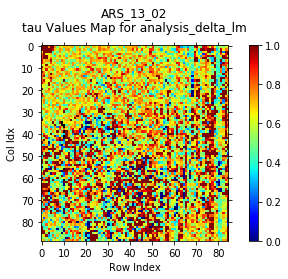

In [62]:
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)


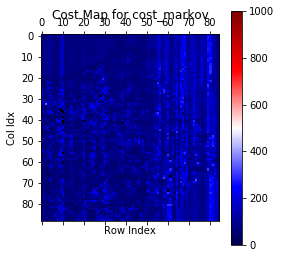

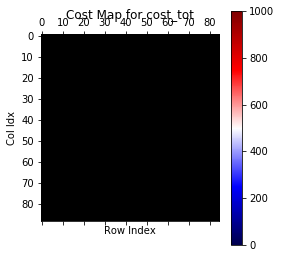

In [76]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


In [73]:
for ii,jj in boni[:2]:
    matrix[ii][jj].Markov_Fit_Params.to_hdf('markov_prova.df', key = str((ii,jj)))

In [75]:
prova = []
for ii,jj in boni[:2]:
    prova.append(pd.read_hdf('markov_prova.df', str((ii,jj))))

In [76]:
prova

[                Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.014327  7.352865  0.109799       -0.062822     0.024737   
 StdErrs   0.037095  0.022252  0.013402        0.015080     0.017203   
 Initials  0.010000  7.661468  0.100000        0.000000     0.100000   
 
           delta_amplitude             A          mu       sigma     shift  \
 Values           0.010305  4.591798e+05    7.281757   27.668869  0.022426   
 StdErrs          0.006008  6.268120e+14  179.072939  328.922012  0.019807   
 Initials         1.000000  4.546282e+03   11.962272   16.790802  0.000000   
 
             offset  
 Values    7.334511  
 StdErrs   1.702030  
 Initials  0.000000  ,
                 Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.013601  7.355861  0.106380       -0.056326     0.001690   
 StdErrs   0.030762  0.023175  0.012922        0.002597     0.003721   
 Initials  0.014327  7.352865  0.109799       -0.062822     0.024737   
 
           delta_